In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

# Try different encodings
encodings = ['utf-8', 'latin1', 'iso-8859-1', 'utf-16']

for encoding in encodings:
    try:
        df = pd.read_csv("C:\\Users\\Paras Sharma\\Downloads\\spam.csv", encoding=encoding)
        print("File read successfully with encoding:", encoding)
        break
    except UnicodeDecodeError:
        print("Error reading file with encoding:", encoding)



Error reading file with encoding: utf-8
File read successfully with encoding: latin1


In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.drop(columns=['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'],inplace =True)

In [5]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
df.rename(columns={'v1':'Category','v2':'Text'},inplace=True)
df.head()

,Category,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Text      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
df.shape

(5572, 2)

In [9]:
df.describe()

,Category,Text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
df.duplicated().sum()

403

In [11]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [12]:
df.shape

(5169, 2)

In [13]:
import re  
import string 
import nltk
from nltk.corpus import stopwords  
from nltk.stem import LancasterStemmer

In [14]:
stop_words = set(stopwords.words('english'))
stemmer = LancasterStemmer()

def cleaning_data(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["CleanText"] = df["Text"].apply(cleaning_data)

In [15]:
df

,Category,Text,CleanText
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis great world...
1,ham,Ok lar... Joking wif u oni...,lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win cup final tkts may te...
3,ham,U dun say so early hor... U c already then say...,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,time tried contact pound prize claim easy call...
5568,ham,Will Ì_ b going to esplanade fr home?,going esplanade home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood suggestions
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...


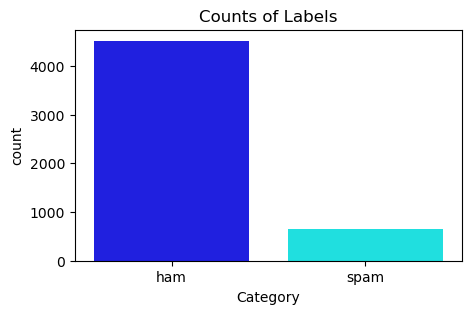

In [16]:
fig = plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='Category', palette=["#0000FF", "#00FFFF"])
plt.title("Counts of Labels")
plt.show()

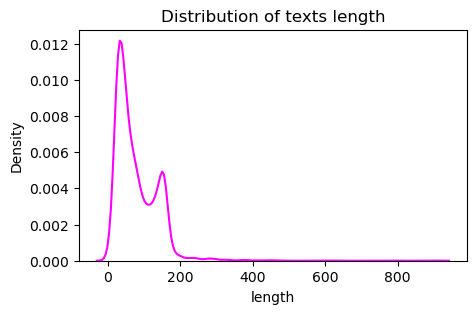

In [17]:
df['length'] = df.Text.apply(len)

fig = plt.figure(figsize=(5, 3))
sns.kdeplot(data=df, x='length', color = '#FF00FF')
plt.title("Distribution of texts length")
plt.show()

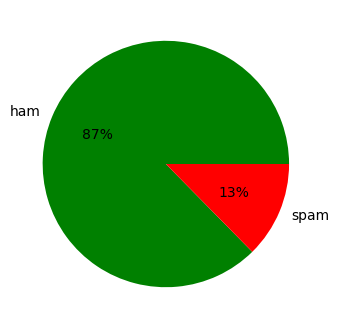

In [18]:
plt.figure(figsize=(6, 4))
colors = ['green', 'red'] 
category_counts = df["Category"].value_counts()
plt.pie(category_counts, labels=category_counts.index, colors = colors , autopct="%0.0f%%")
plt.show()

In [19]:
X = df['Text']

Y = df['Category']

In [20]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Text, Length: 5169, dtype: object

In [21]:
Y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Category, Length: 5169, dtype: object

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size =0.2 , random_state =3)

In [23]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5169,)
(4135,)
(1034,)


In [24]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(5169,)
(4135,)
(1034,)


In [26]:
# Assuming X_train, X_test, Y_train, Y_test, and model are already defined

# Initialize TfidfVectorizer and fit it only on the training data
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)

# Transform the testing data using the same vectorizer
X_test_features = feature_extraction.transform(X_test)





In [27]:
X_train

4443                       COME BACK TO TAMPA FFFFUUUUUUU
982     Congrats! 2 mobile 3G Videophones R yours. cal...
3822    Please protect yourself from e-threats. SIB ne...
3924       As if i wasn't having enough trouble sleeping.
4927    Just hopeing that wasnÛ÷t too pissed up to re...
                              ...                        
806      sure, but make sure he knows we ain't smokin yet
990                                          26th OF JULY
1723    Hi Jon, Pete here, Ive bin 2 Spain recently & ...
3519    No it will reach by 9 only. She telling she wi...
1745    IåÕm cool ta luv but v.tired 2 cause i have be...
Name: Text, Length: 4135, dtype: object

In [28]:
print(X_train_features)

  (0, 2697)	0.7205755344386542
  (0, 6409)	0.5950532917415522
  (0, 1825)	0.35592482233751443
  (1, 5438)	0.27399320458839144
  (1, 4583)	0.27399320458839144
  (1, 4438)	0.22516921191243092
  (1, 5036)	0.27399320458839144
  (1, 2274)	0.27399320458839144
  (1, 2920)	0.23390504161994488
  (1, 3610)	0.27399320458839144
  (1, 4984)	0.19732502227978832
  (1, 4180)	0.23390504161994488
  (1, 7137)	0.24133495616477563
  (1, 6940)	0.27399320458839144
  (1, 203)	0.27399320458839144
  (1, 6941)	0.27399320458839144
  (1, 453)	0.25698446420786897
  (1, 4333)	0.15929709793058355
  (1, 1885)	0.22516921191243092
  (2, 953)	0.26160275768603725
  (2, 4856)	0.26160275768603725
  (2, 5786)	0.26160275768603725
  (2, 2459)	0.22436535516409714
  (2, 4960)	0.26160275768603725
  (2, 5976)	0.1902832473629628
  :	:
  (4132, 6862)	0.11085392369947865
  (4132, 5612)	0.14854309693836068
  (4132, 3865)	0.16898098428277844
  (4133, 6457)	0.6154177820886059
  (4133, 5320)	0.5530764956488926
  (4133, 2311)	0.4238274869

In [29]:
LR = LogisticRegression()

In [32]:
LR.fit(X_train_features.toarray(), Y_train)
y_pred1 = LR.predict(X_test_features.toarray())

accuracy = accuracy_score(Y_test, y_pred1)
conf_matrix = confusion_matrix(Y_test, y_pred1)
precision = precision_score(Y_test, y_pred1, pos_label = 'spam')

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision Score:", precision)

Accuracy: 0.960348162475822
Confusion Matrix:
 [[894   0]
 [ 41  99]]
Precision Score: 1.0


In [33]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB


In [34]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [36]:
gnb.fit(X_train_features.toarray(), Y_train)
y_pred1 = gnb.predict(X_test_features.toarray())

accuracy = accuracy_score(Y_test, y_pred1)
conf_matrix = confusion_matrix(Y_test, y_pred1)
precision = precision_score(Y_test, y_pred1,pos_label = "spam")

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision Score:", precision)


Accuracy: 0.8800773694390716
Confusion Matrix:
 [[790 104]
 [ 20 120]]
Precision Score: 0.5357142857142857


In [38]:
mnb.fit(X_train_features.toarray(), Y_train)
y_pred1 = mnb.predict(X_test_features.toarray())

accuracy = accuracy_score(Y_test, y_pred1)
conf_matrix = confusion_matrix(Y_test, y_pred1)
precision = precision_score(Y_test, y_pred1, pos_label ="spam")

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision Score:", precision)

Accuracy: 0.9613152804642167
Confusion Matrix:
 [[894   0]
 [ 40 100]]
Precision Score: 1.0


In [41]:
bnb.fit(X_train_features.toarray(), Y_train)
y_pred1 = bnb.predict(X_test_features.toarray())

accuracy = accuracy_score(Y_test, y_pred1)
conf_matrix = confusion_matrix(Y_test, y_pred1)
precision = precision_score(Y_test, y_pred1,pos_label ="spam")

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision Score:", precision)

Accuracy: 0.9729206963249516
Confusion Matrix:
 [[894   0]
 [ 28 112]]
Precision Score: 1.0


In [52]:
input_your_email = ["I HAVE A DATE ON SUNDAY WITH ZUCK!!"]
input_your_email_lower = [text.lower() for text in input_your_email]
input_data_features = feature_extraction.transform(input_your_email_lower)
prediction = bnb.predict(input_data_features)

print(prediction)

if prediction[0] == 'ham':  # Check if the prediction is 'ham'
    print("Ham mail")
else:
    print("Spam mail")


['ham']
Ham mail
